In [11]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
data = pd.read_csv('Data_set.csv')

In [12]:
info_sources_data = data['Source']

In [13]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    return text


In [14]:
cleaned_sources = info_sources_data.apply(preprocess_text)
all_words = ' '.join(cleaned_sources).split()
word_counts = Counter(all_words)
common_stop_words = {'the', 'and', 'for', 'to', 'a', 'in', 'of', 'is', 'with', 'that', 'it', 'as', 'on', 'are', 'this', 'by', 'an', 'be', 'at', 'or', 'from', 'we', 'will', 'not'}
common_words = {word: count for word, count in word_counts.items() if word not in common_stop_words}
most_common_sources = Counter(common_words).most_common(10)
print("Most common sources of investment information:")
for source, count in most_common_sources:
    print(f"{source}: {count}")
main_sources = [source for source, count in most_common_sources]
summary = "\n".join([f"- {source.capitalize()}" for source in main_sources])
print("\nSummary of main information sources:")
print(summary)

Most common sources of investment information:
financial: 16
consultants: 16
newspapers: 14
magazines: 14
television: 6
internet: 4

Summary of main information sources:
- Financial
- Consultants
- Newspapers
- Magazines
- Television
- Internet


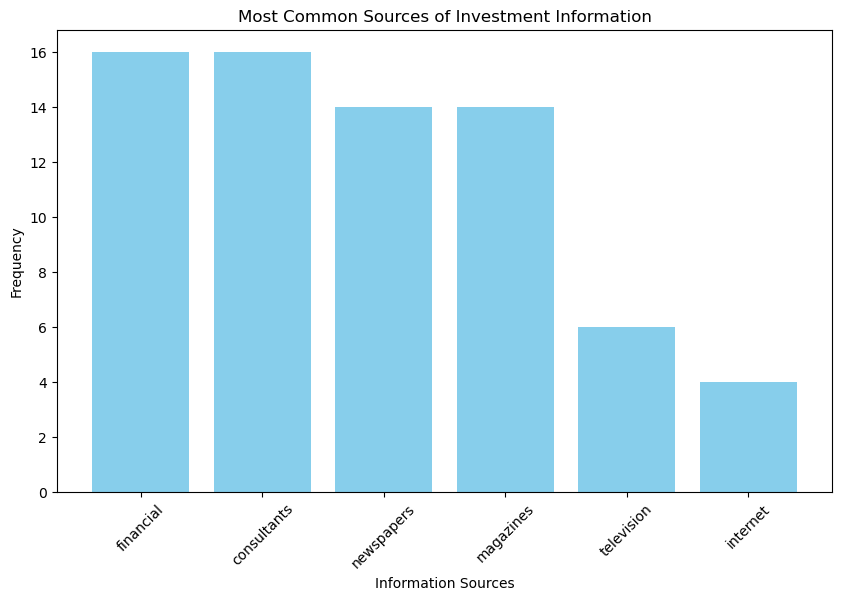

In [15]:
labels, values = zip(*most_common_sources)
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Information Sources')
plt.ylabel('Frequency')
plt.title('Most Common Sources of Investment Information')
plt.xticks(rotation=45)
plt.show()